In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats
import xgboost as xgb
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import gridspec

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

In [95]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
def plotScatter(a, b, name1, name2):
    scatplotdata = pd.DataFrame({name1:a, name2:b})
    scatplotdata.plot(x = name1, y = name2, kind = "scatter")
    return()

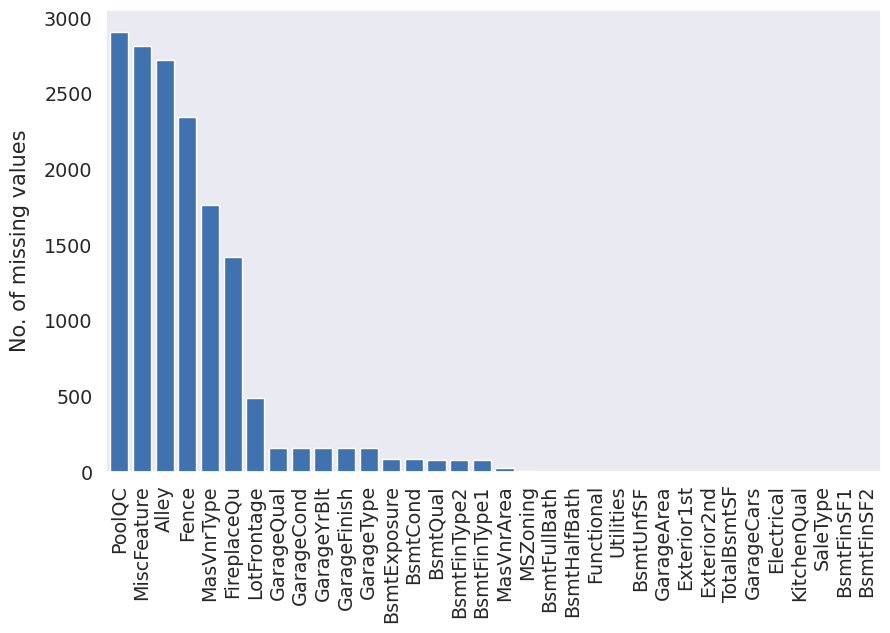

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageQual', 'GarageCond', 'GarageYrBlt',
       'GarageFinish', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual',
       'BsmtFinType2', 'BsmtFinType1', 'MasVnrArea', 'MSZoning',
       'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'Utilities', 'BsmtUnfSF',
       'GarageArea', 'Exterior1st', 'Exterior2nd', 'TotalBsmtSF', 'GarageCars',
       'Electrical', 'KitchenQual', 'SaleType', 'BsmtFinSF1', 'BsmtFinSF2'],
      dtype='object')

In [98]:
data = pd.concat([train_df.drop("SalePrice",axis=1),test_df])
nans = data.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()
nans.index

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
Alleyerror
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrTypeerror
MasVnrArea
ExterQual
ExterCond


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Foundation
BsmtQual
BsmtQualerror
BsmtCond
BsmtConderror
BsmtExposure
BsmtExposureerror
BsmtFinType1
BsmtFinType1error
BsmtFinSF1
BsmtFinType2
BsmtFinType2error
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
Electricalerror
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
FireplaceQuerror
GarageType
GarageTypeerror
GarageYrBlt
GarageFinish
GarageFinisherror
GarageCars
GarageArea
GarageQual
GarageQualerror
GarageCond
GarageConderror
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
PoolQCerror
Fence
Fenceerror
MiscFeature
MiscFeatureerror
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


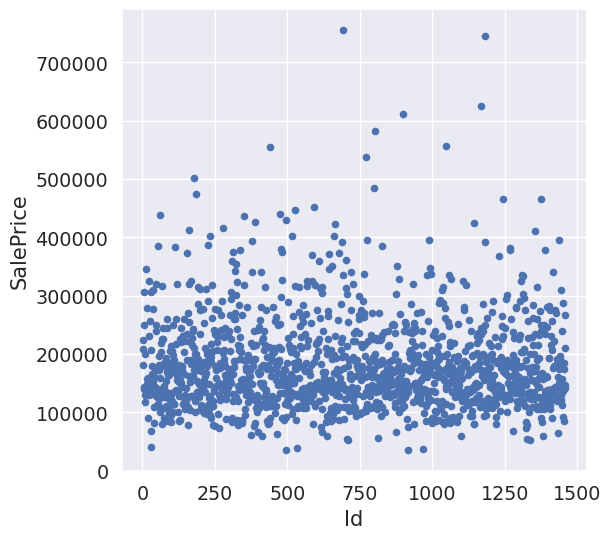

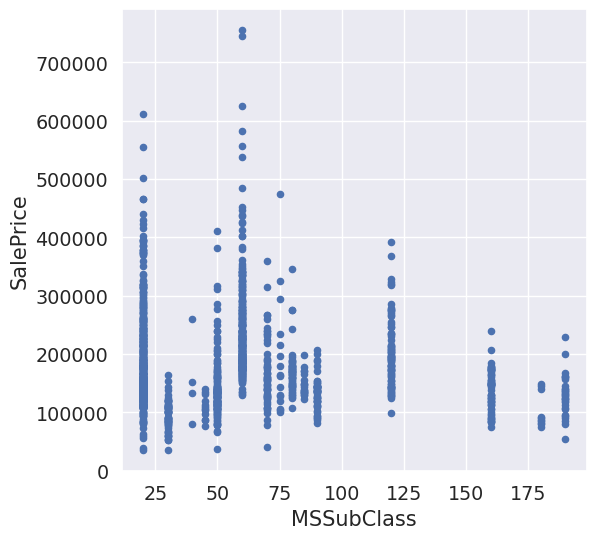

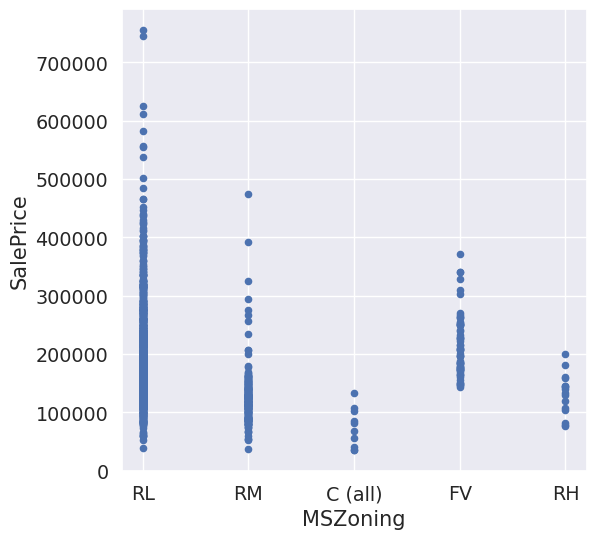

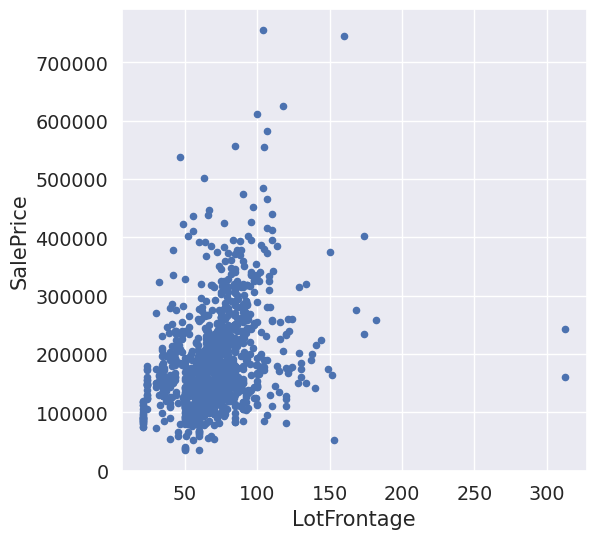

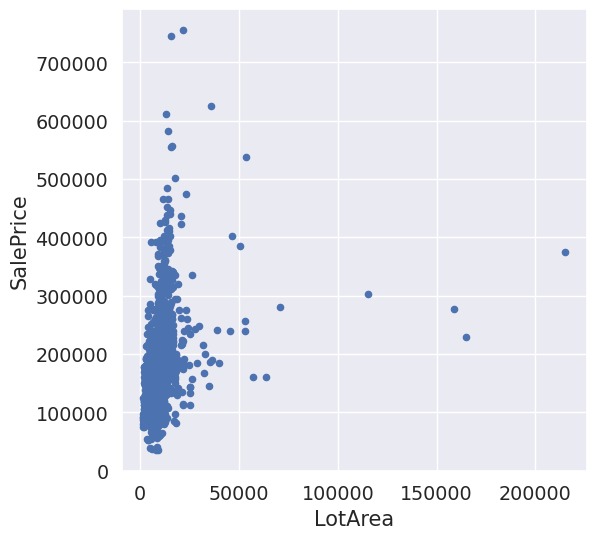

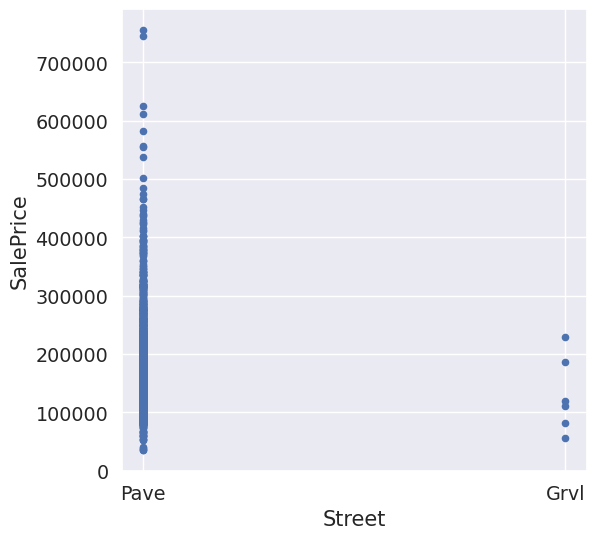

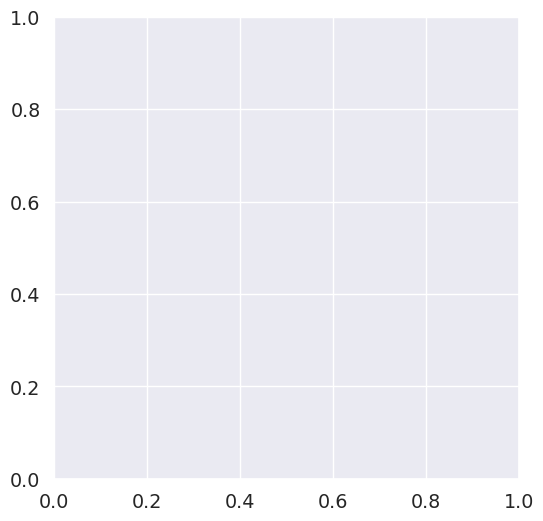

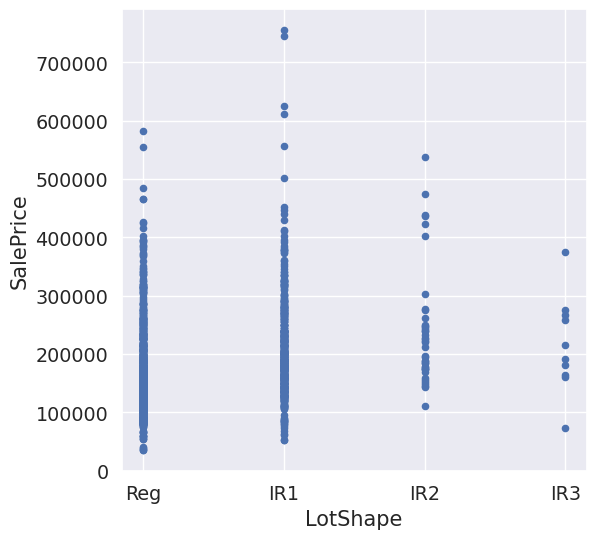

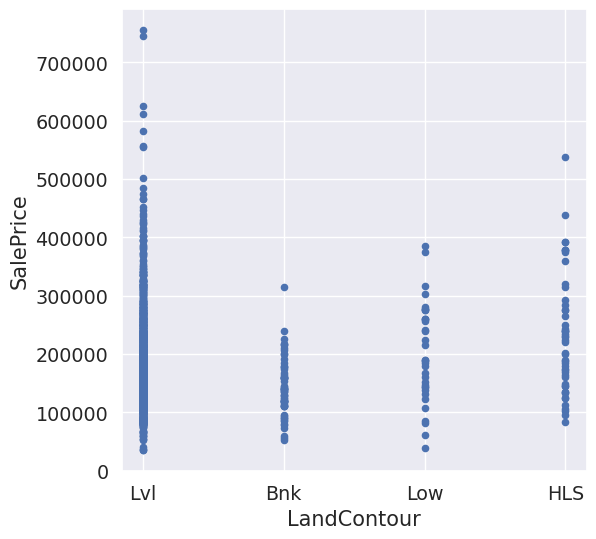

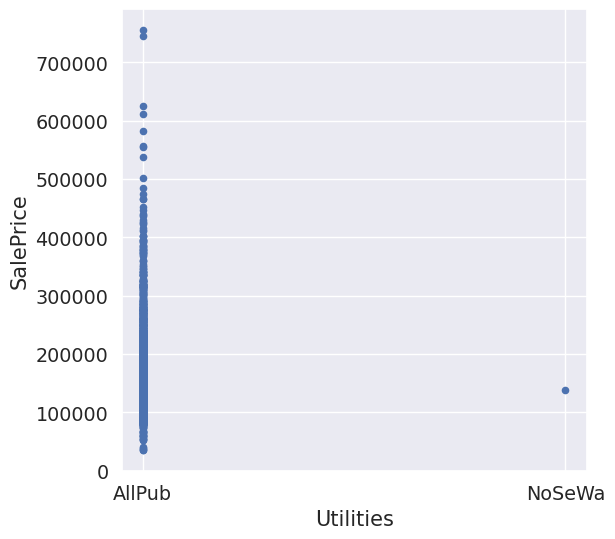

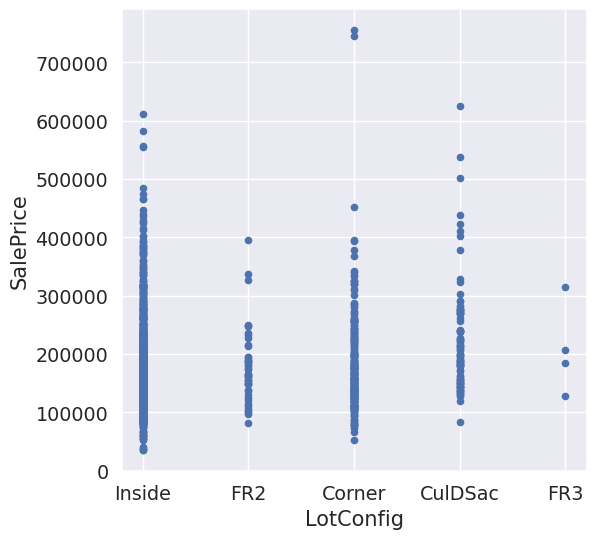

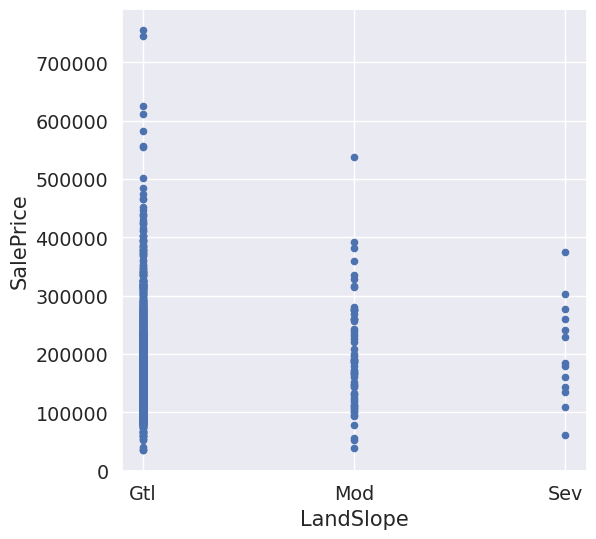

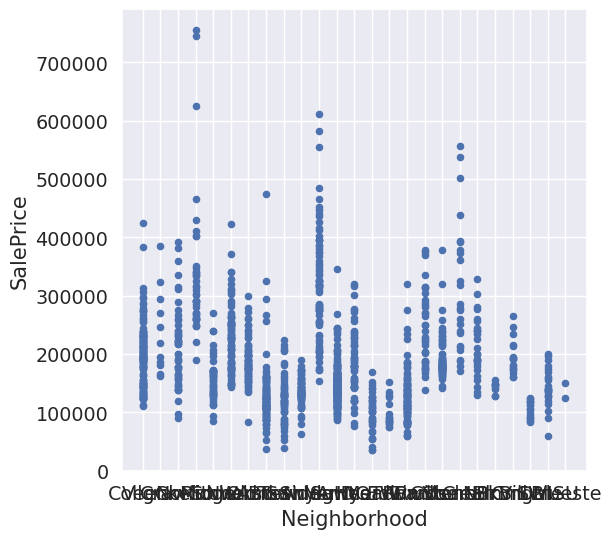

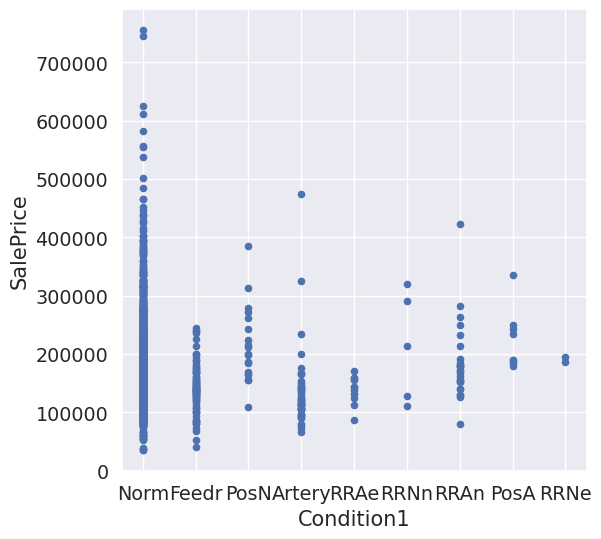

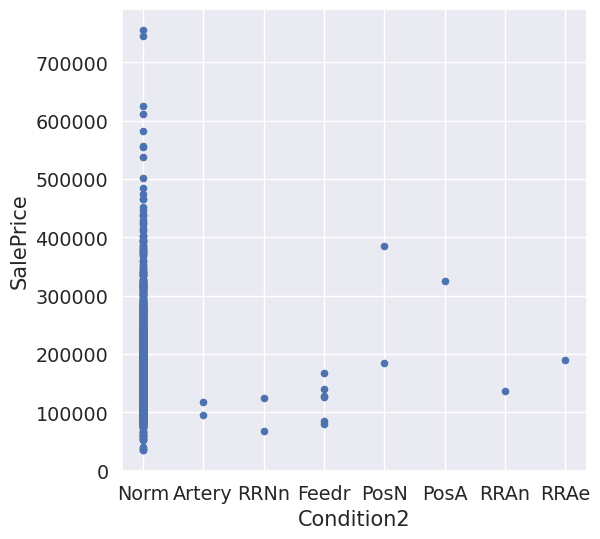

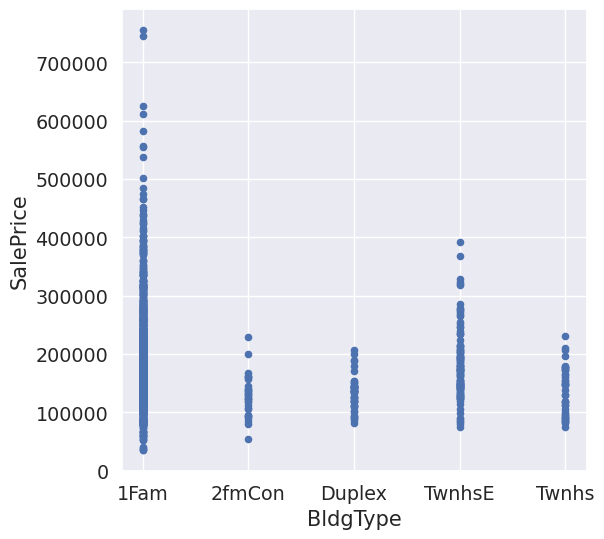

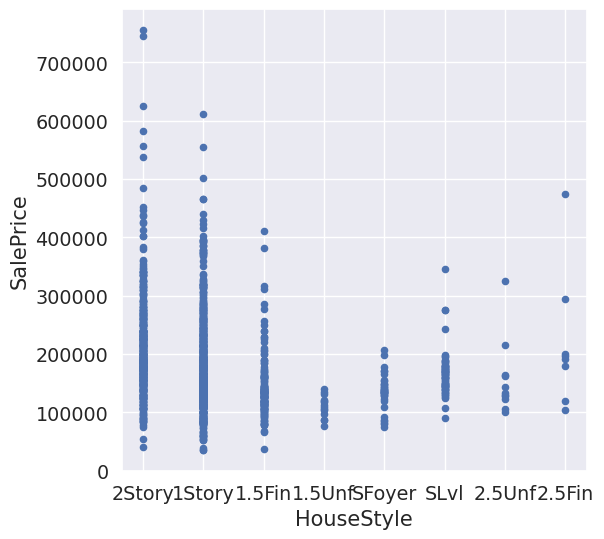

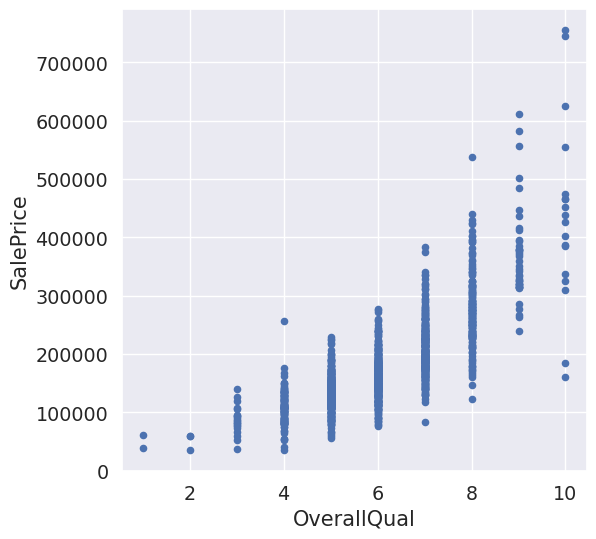

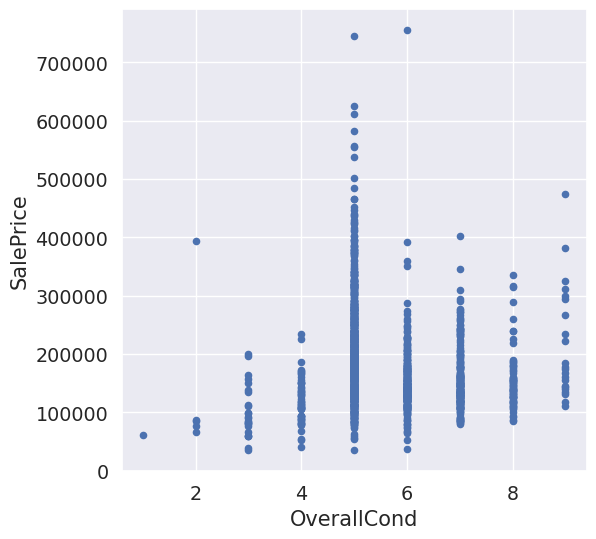

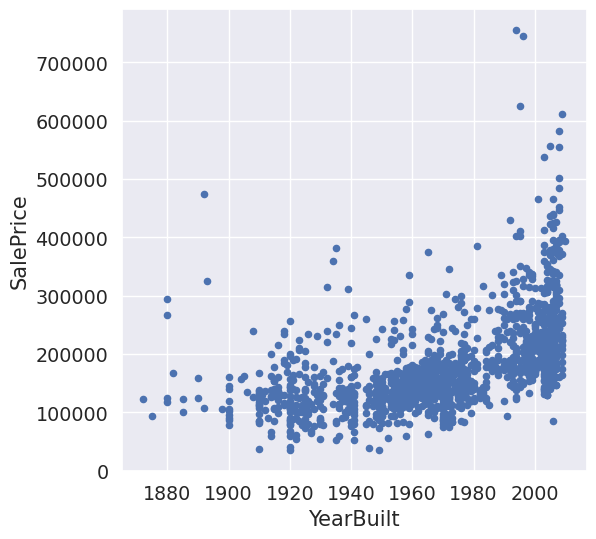

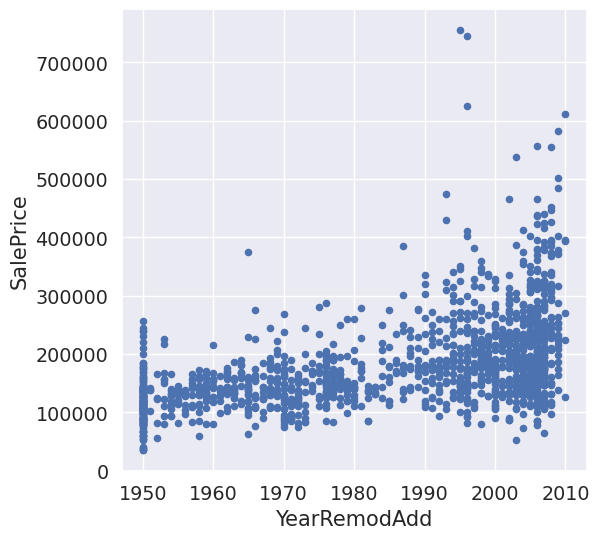

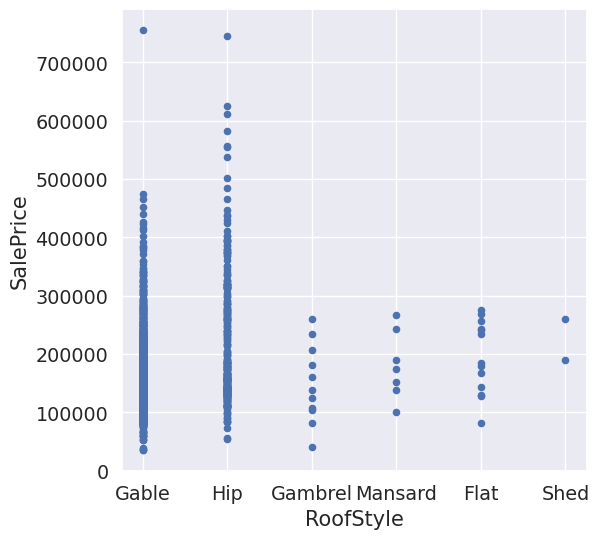

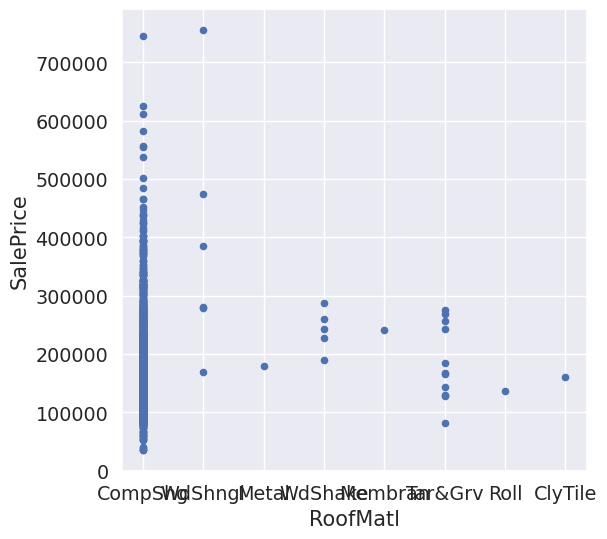

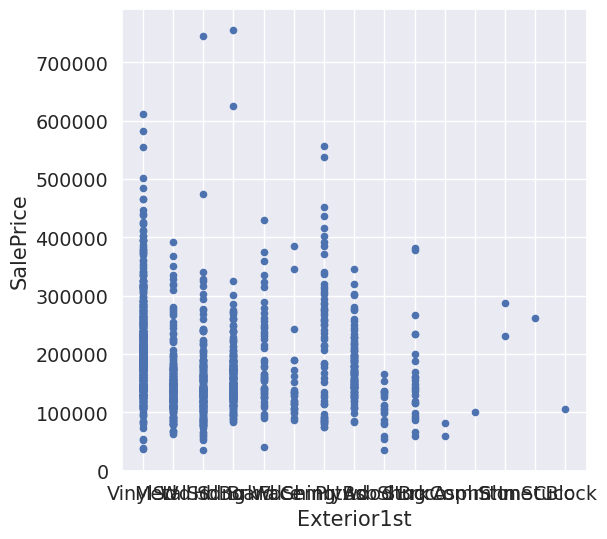

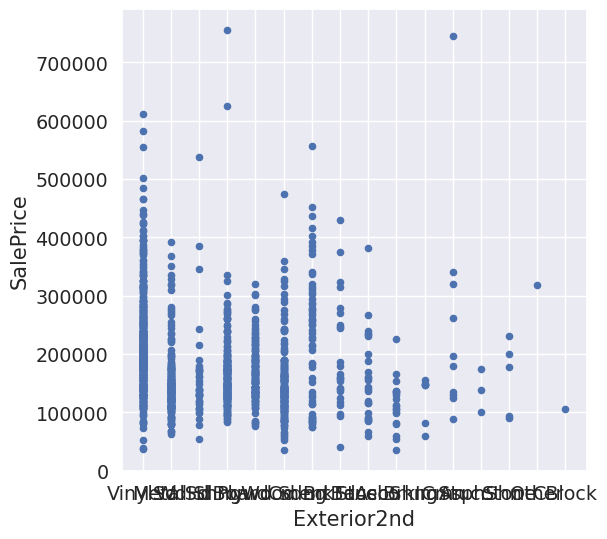

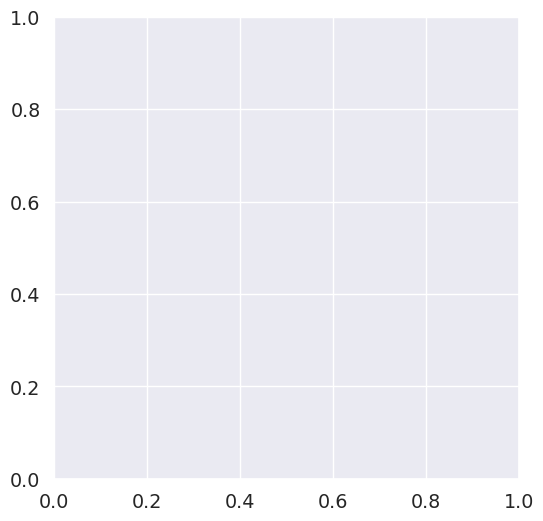

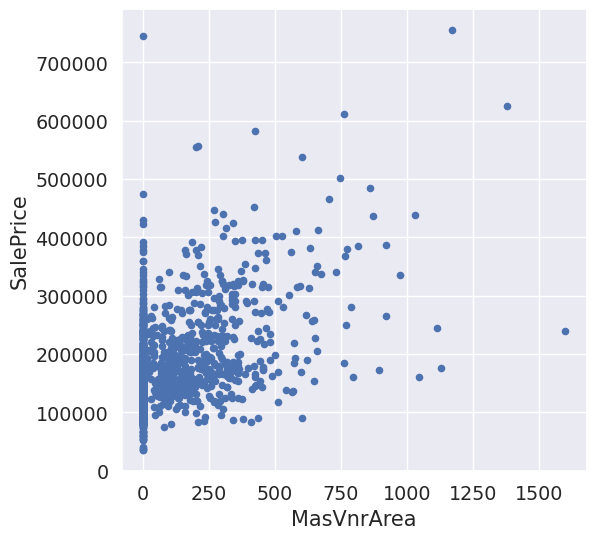

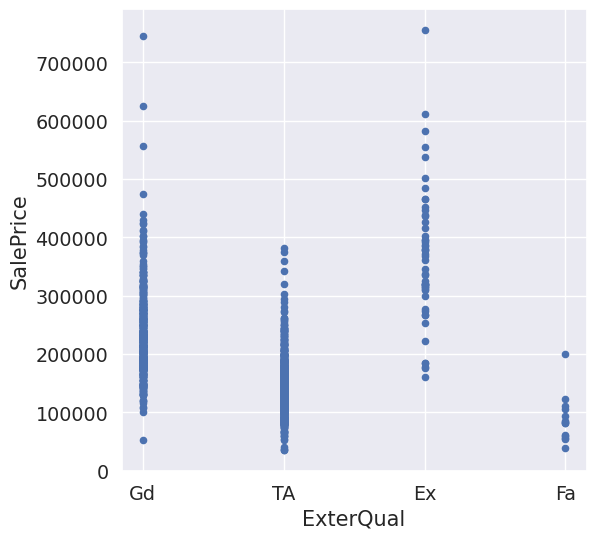

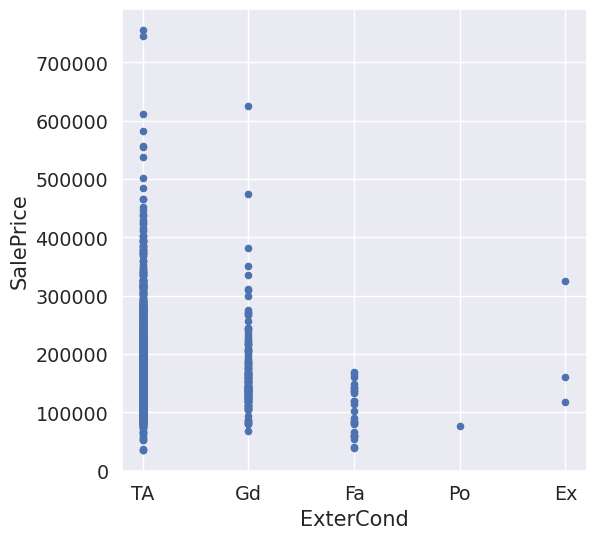

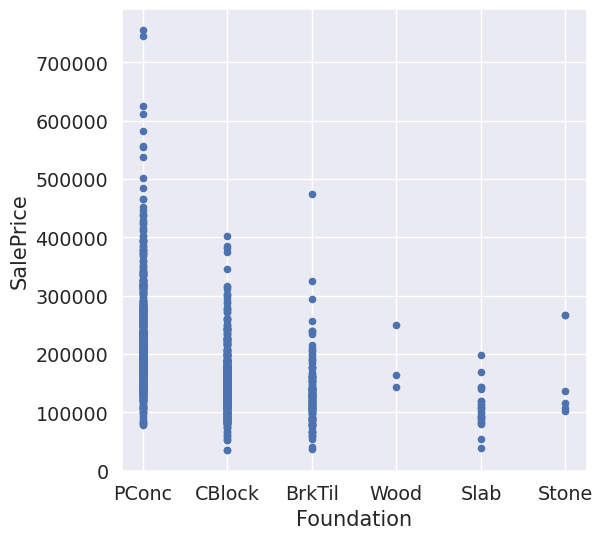

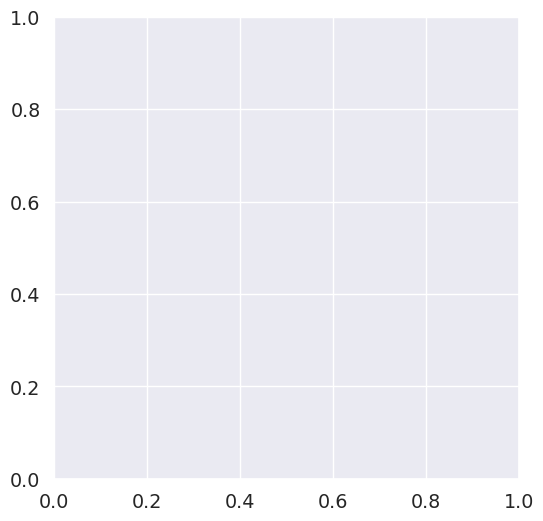

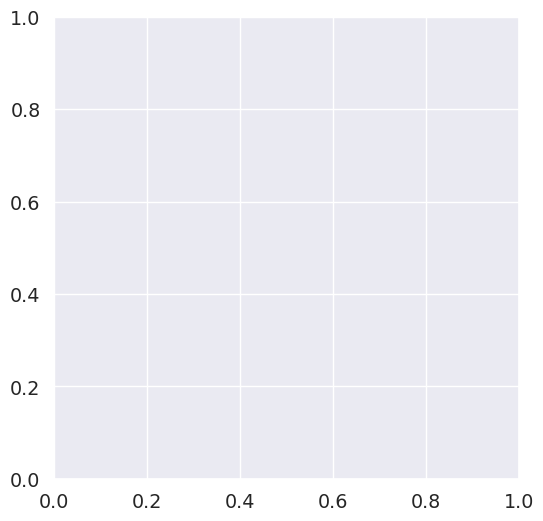

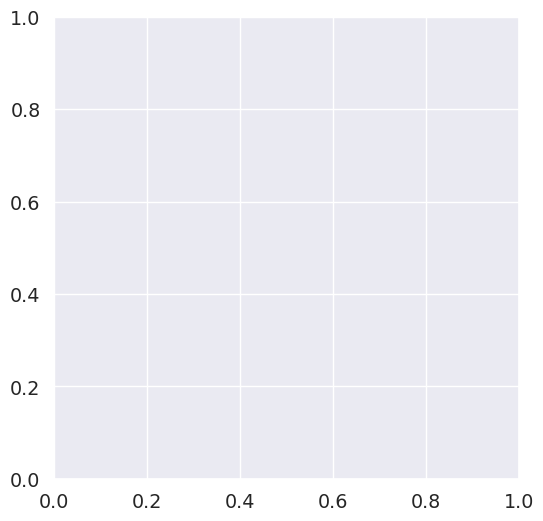

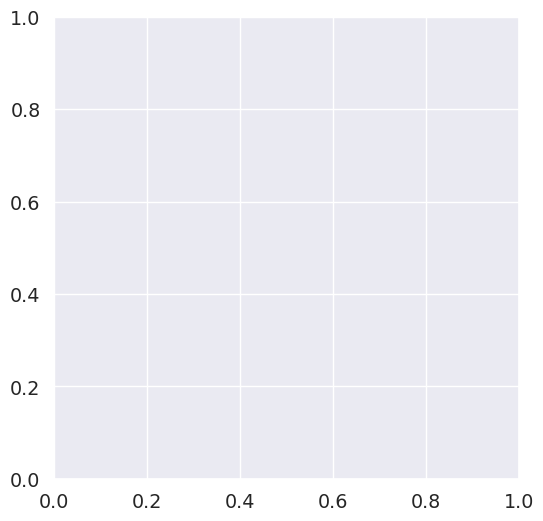

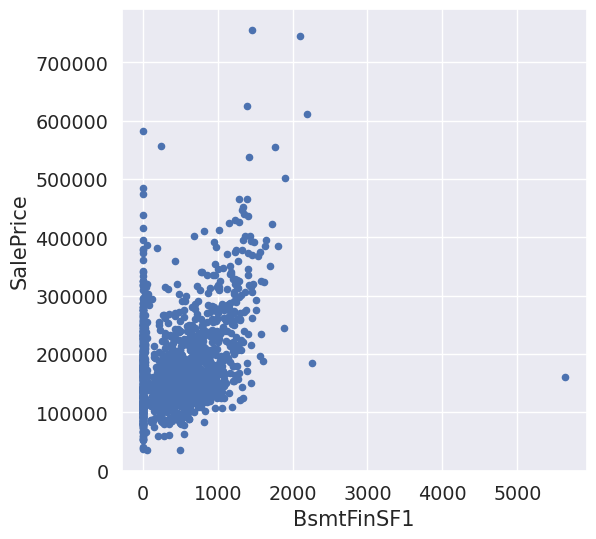

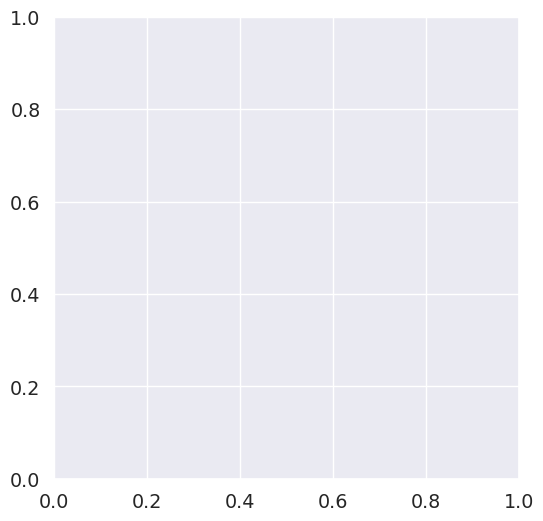

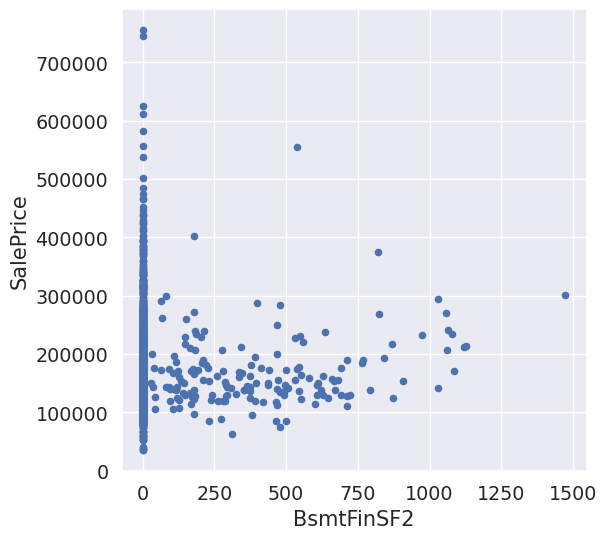

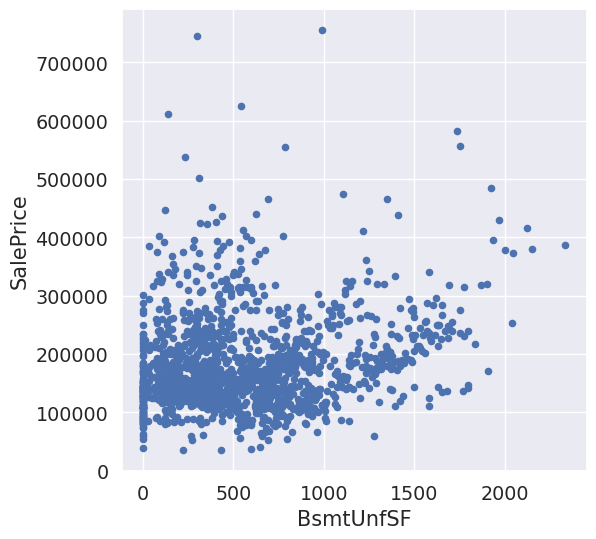

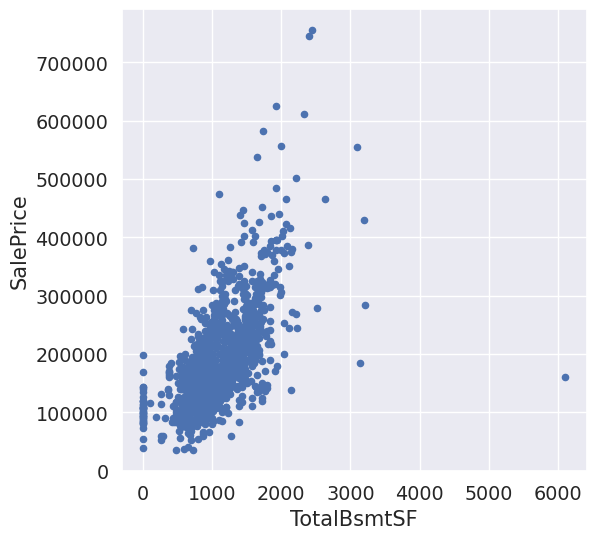

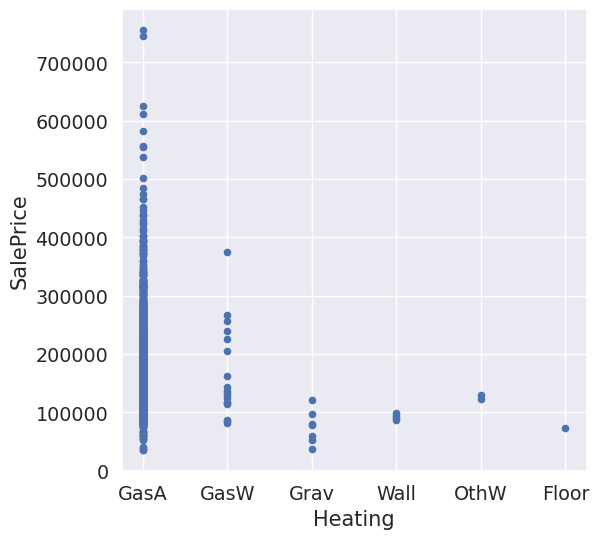

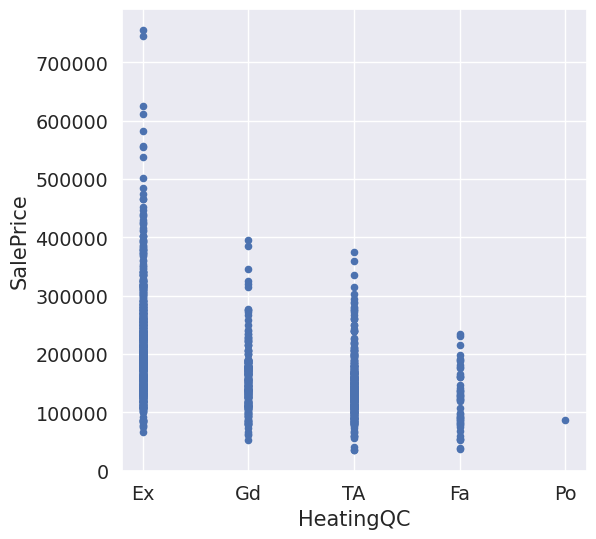

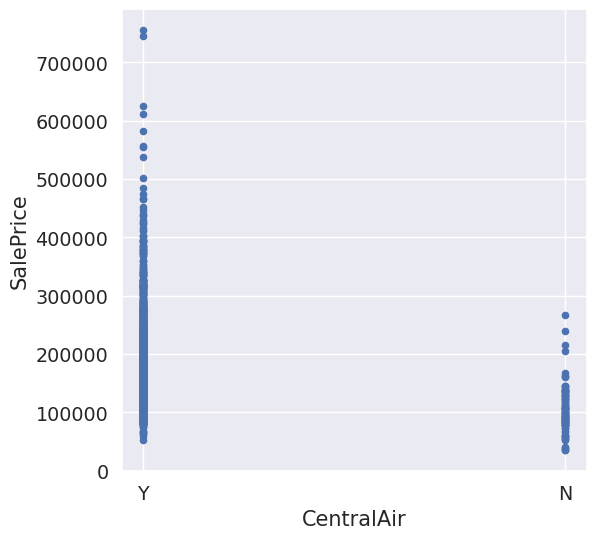

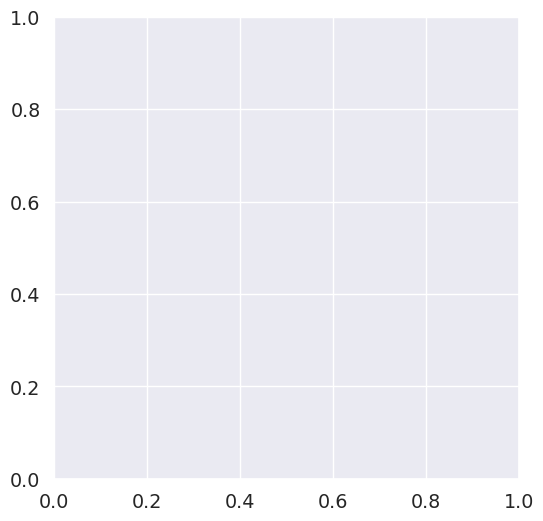

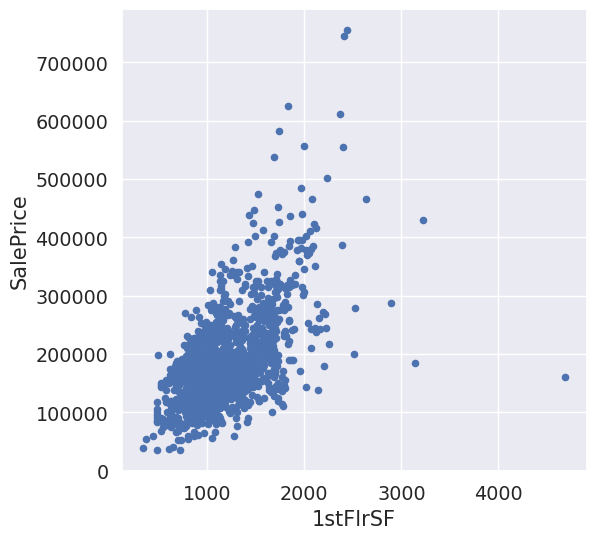

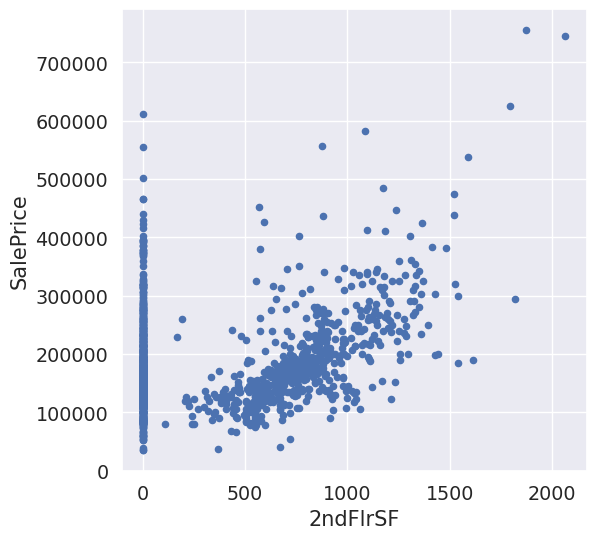

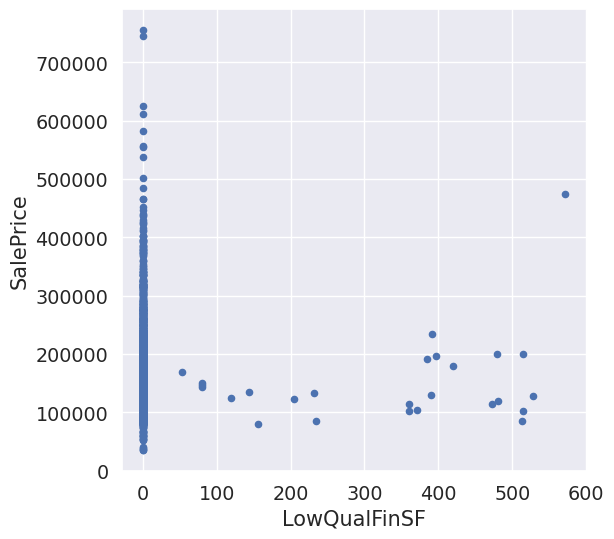

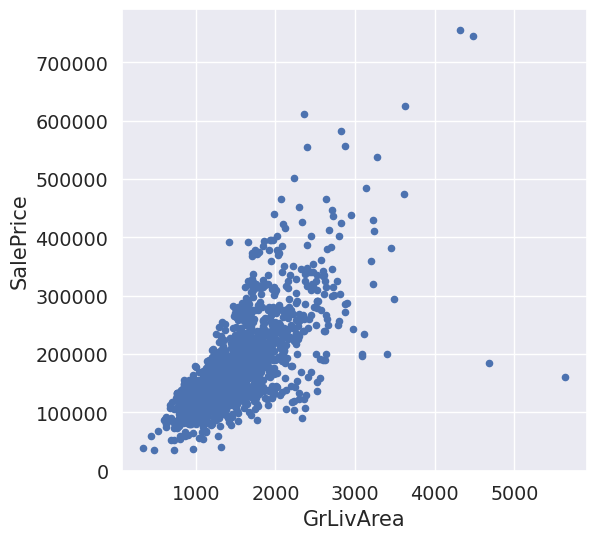

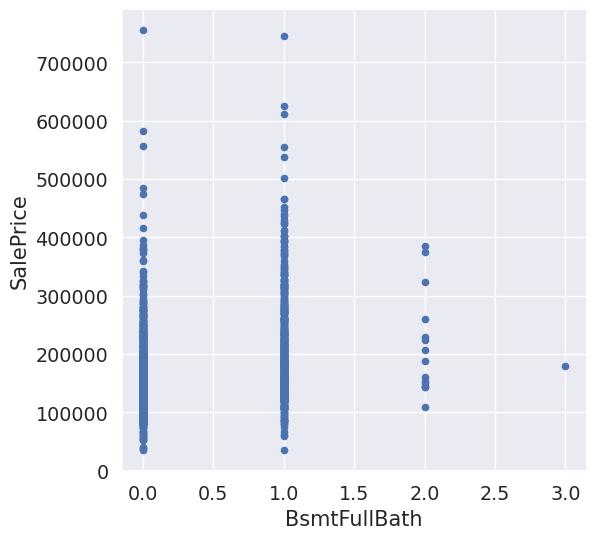

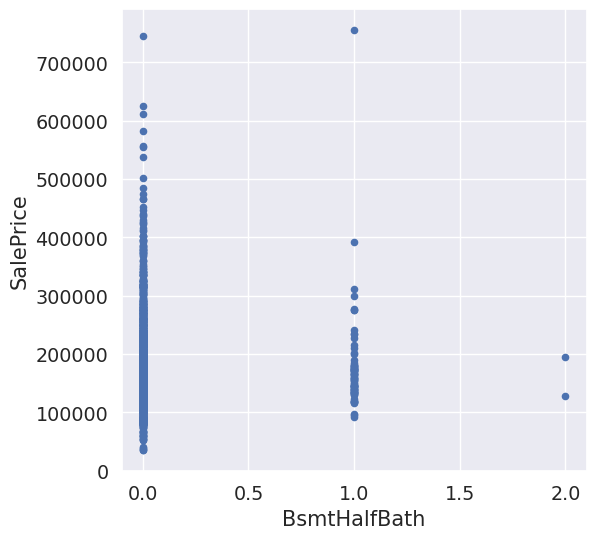

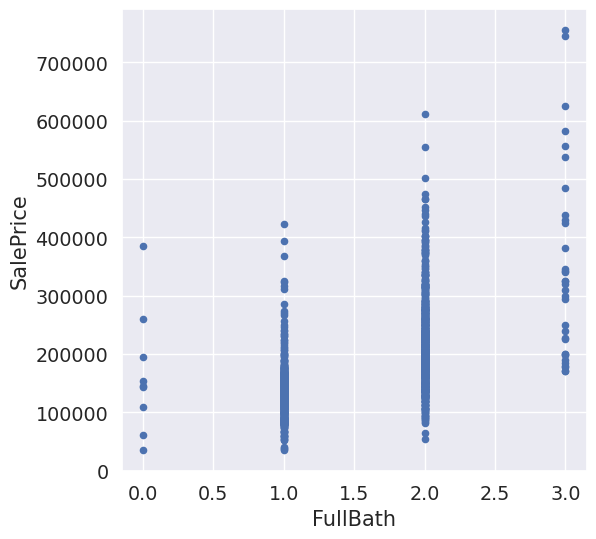

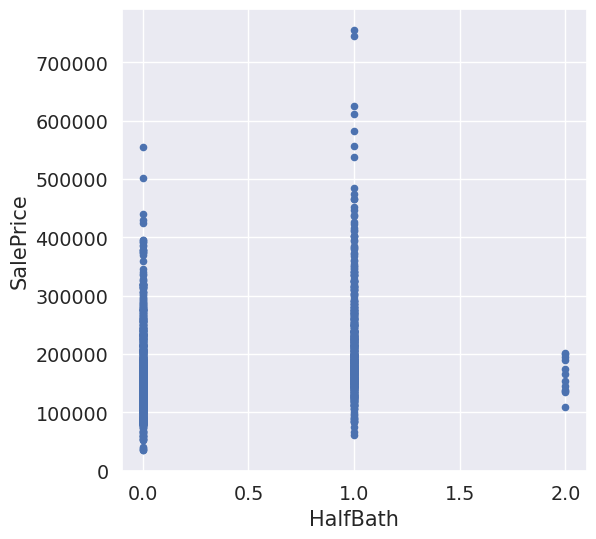

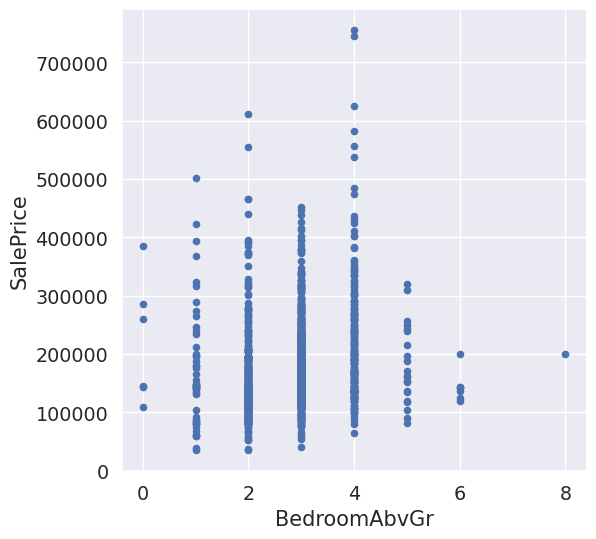

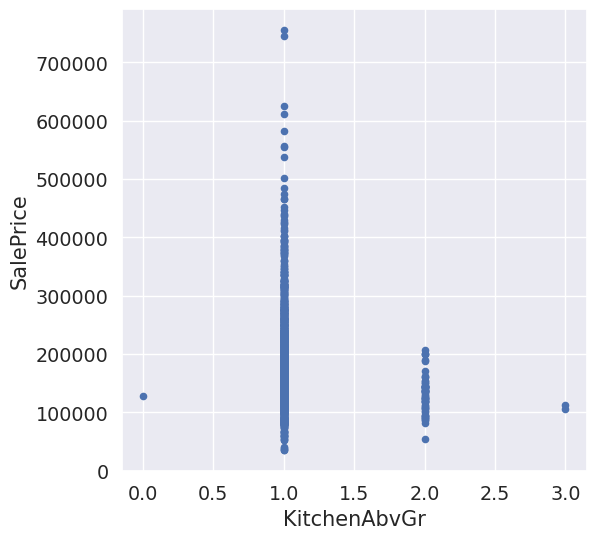

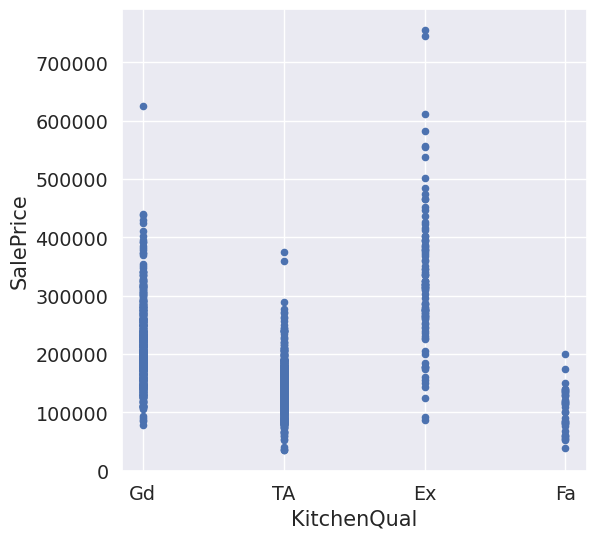

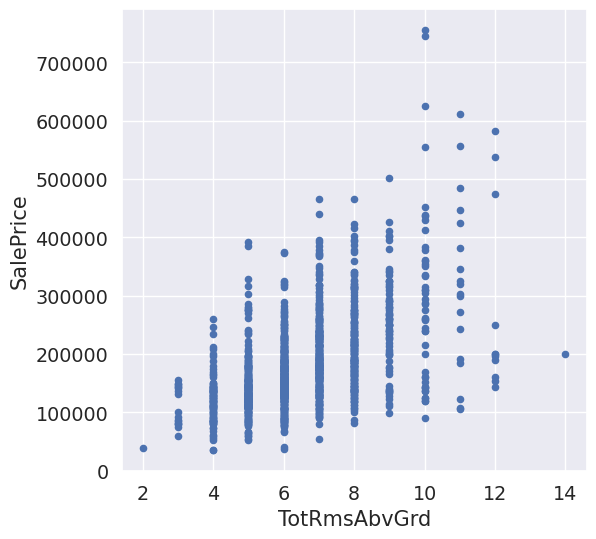

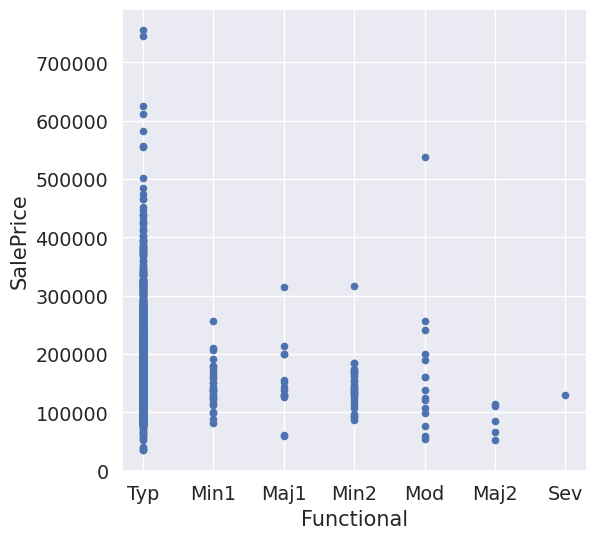

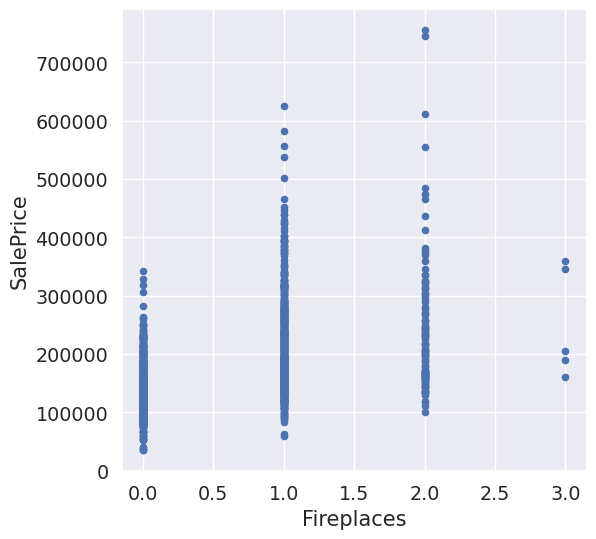

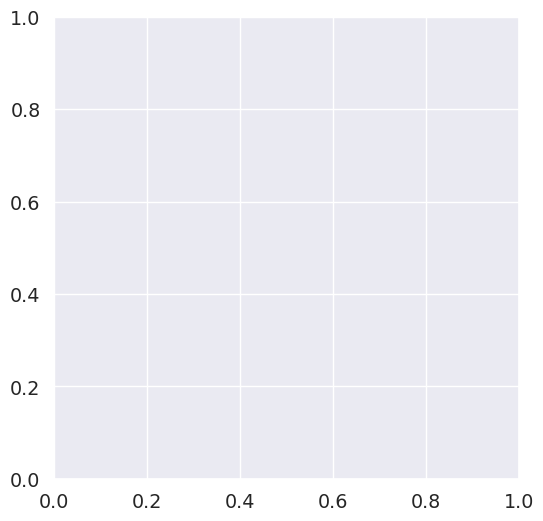

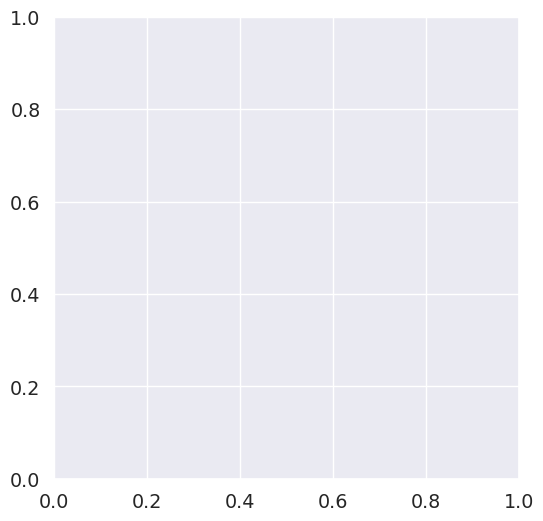

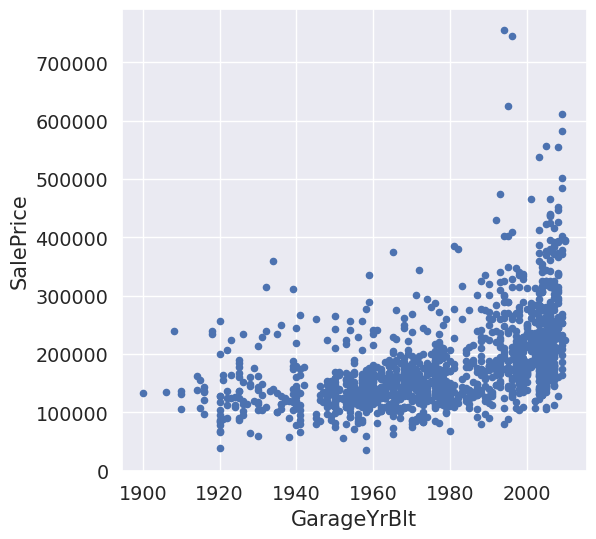

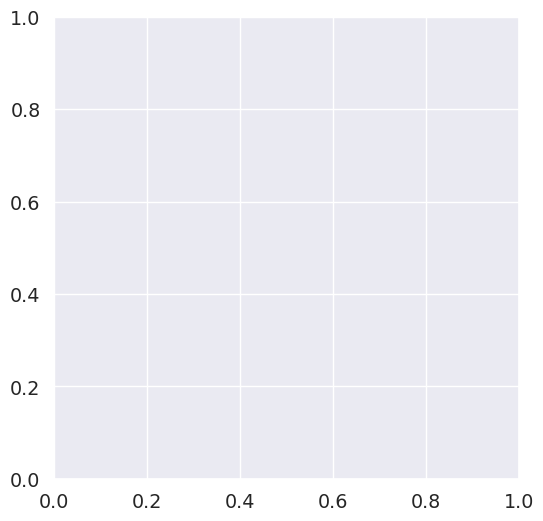

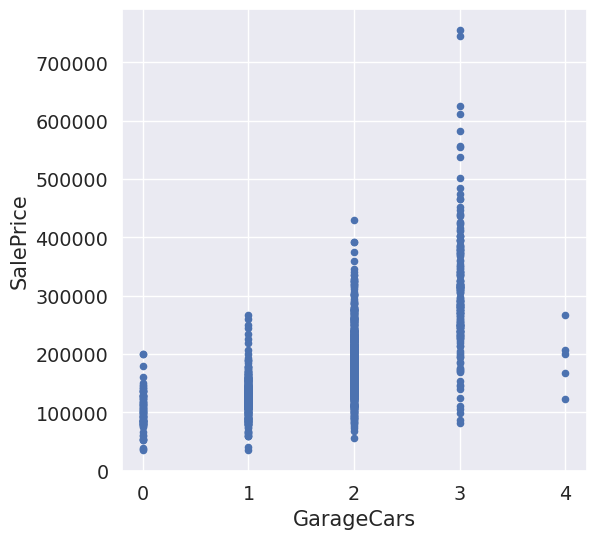

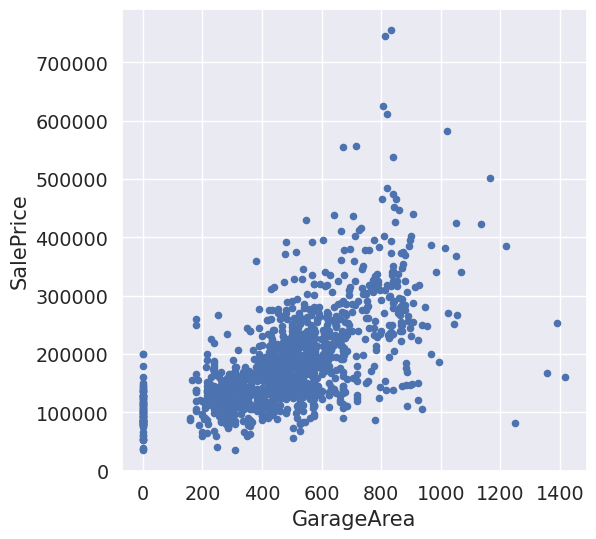

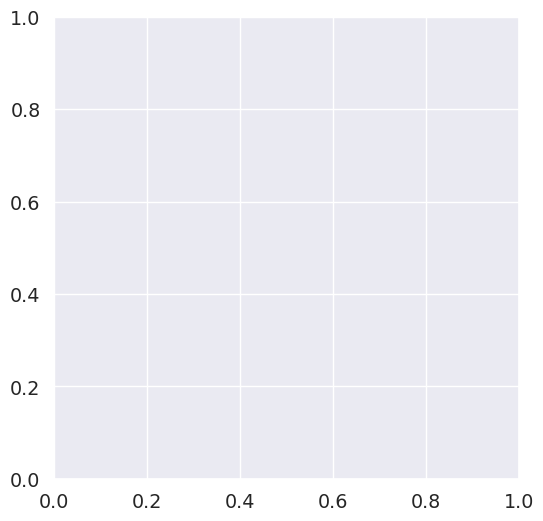

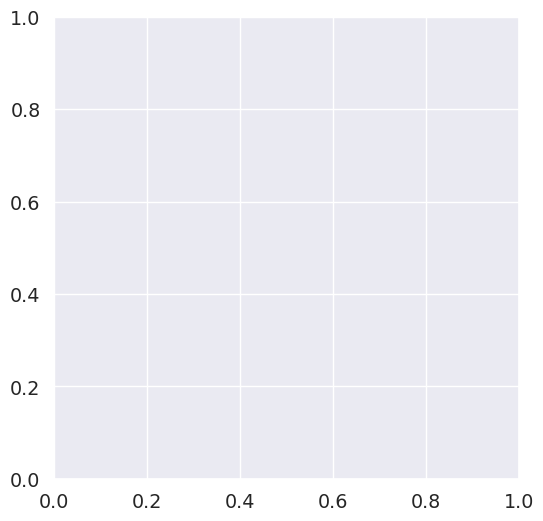

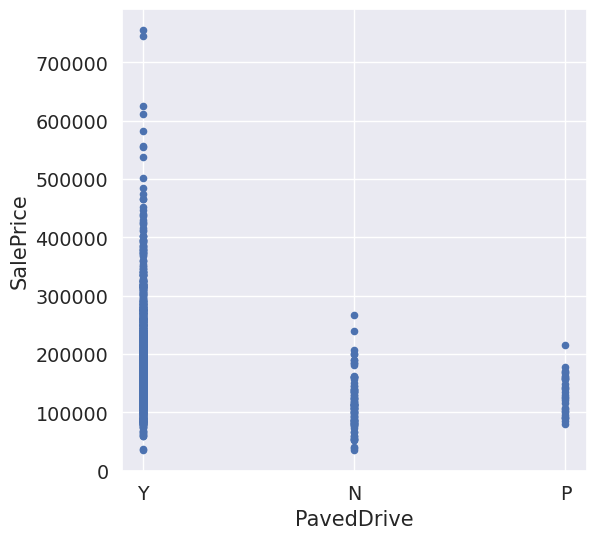

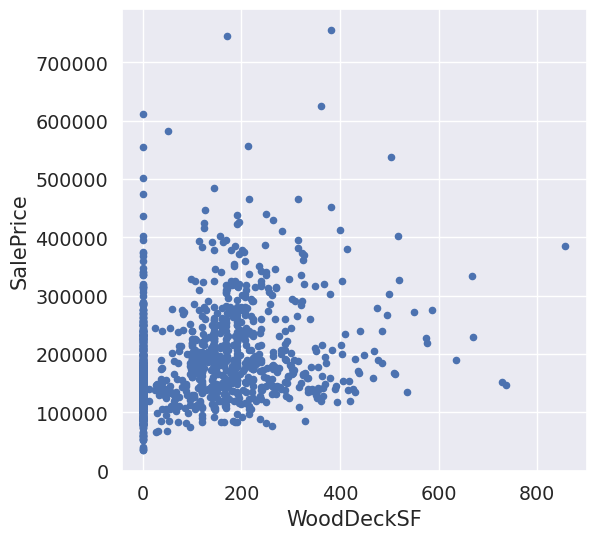

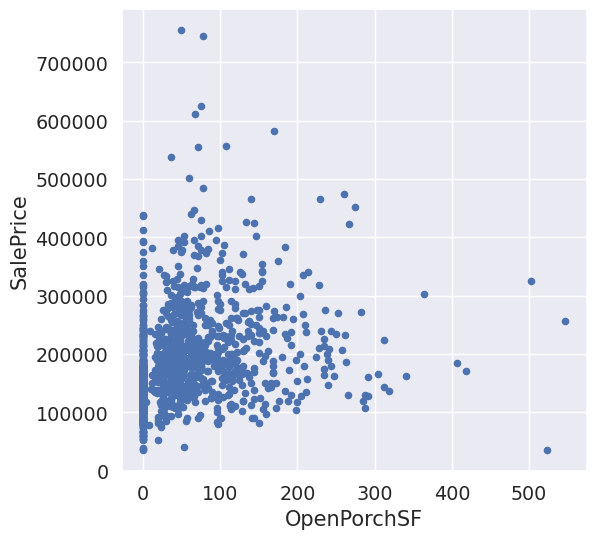

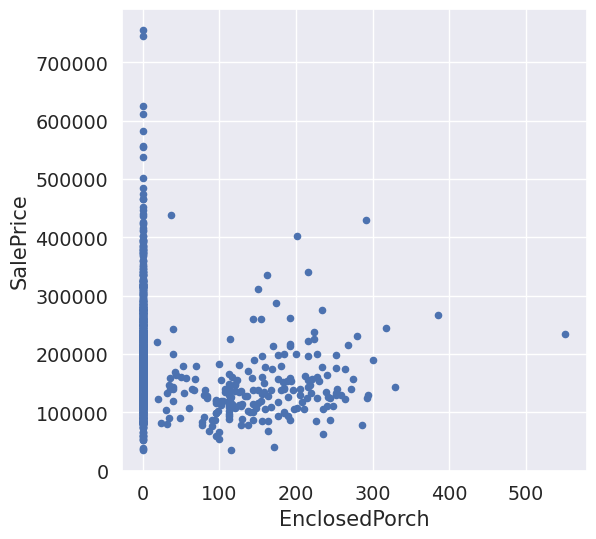

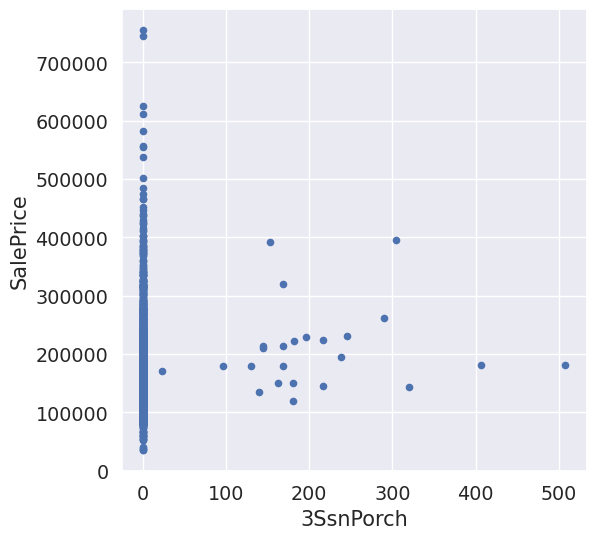

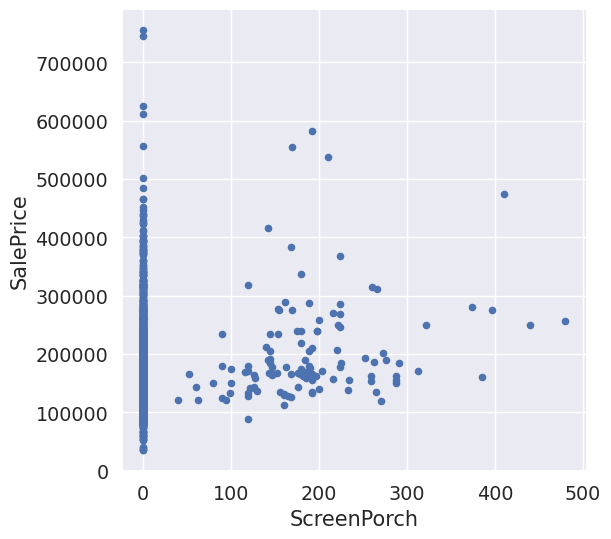

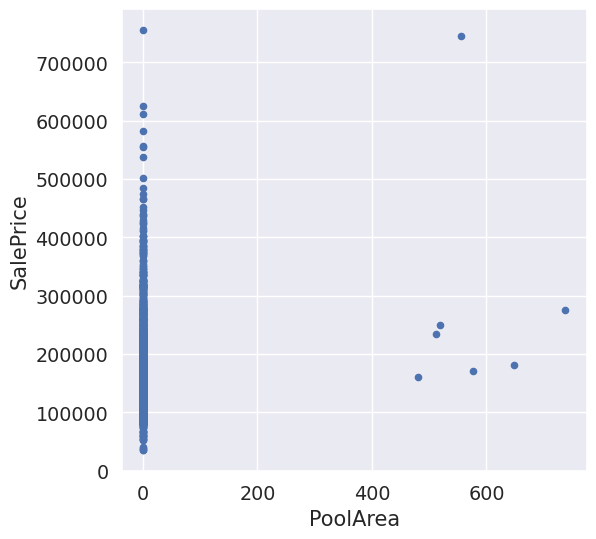

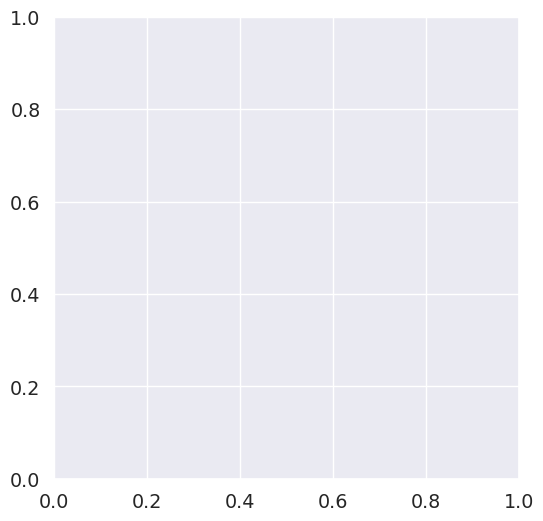

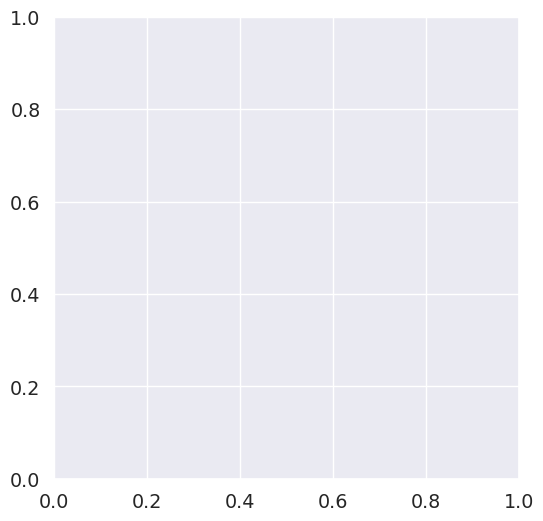

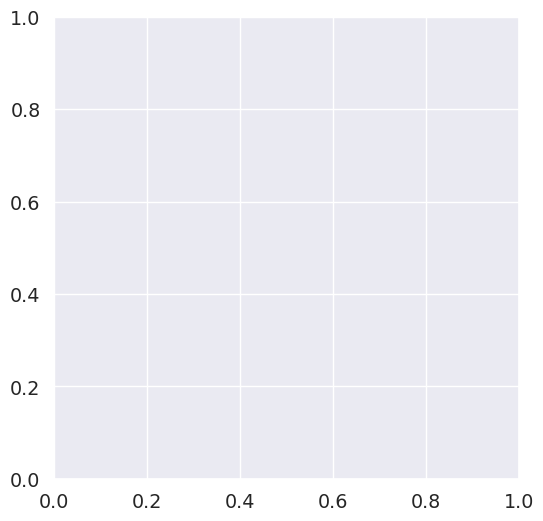

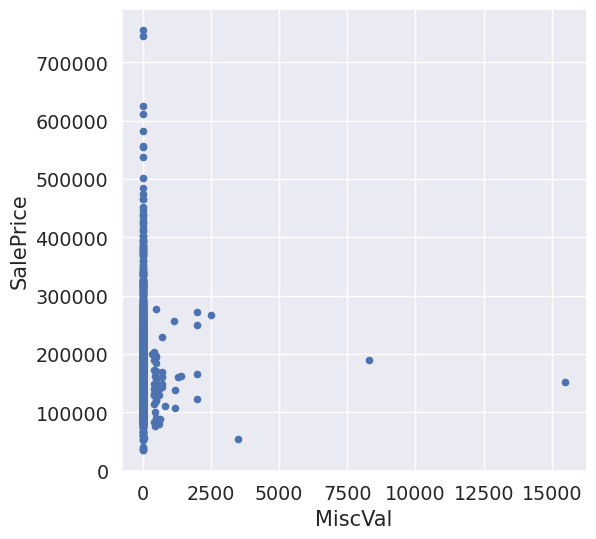

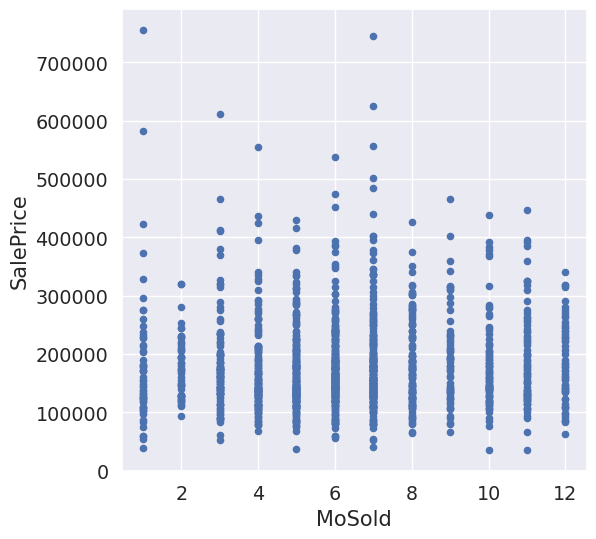

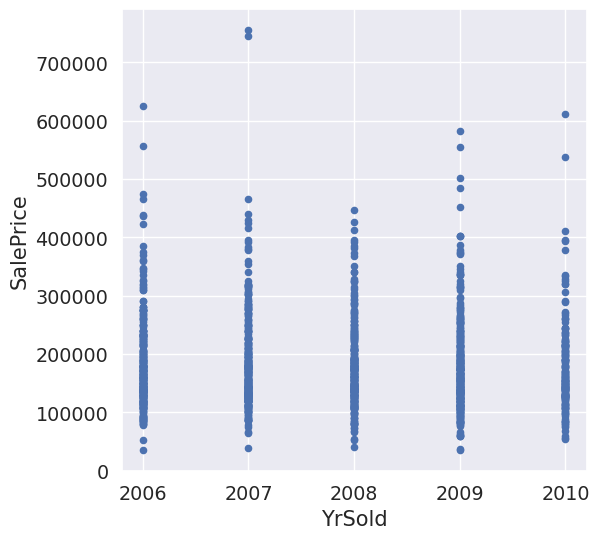

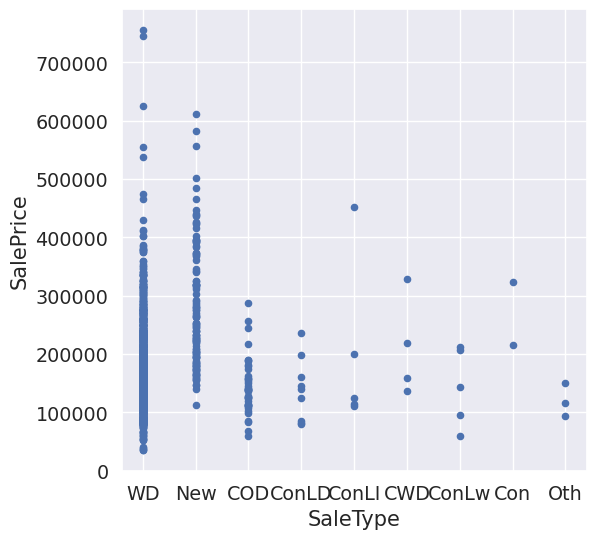

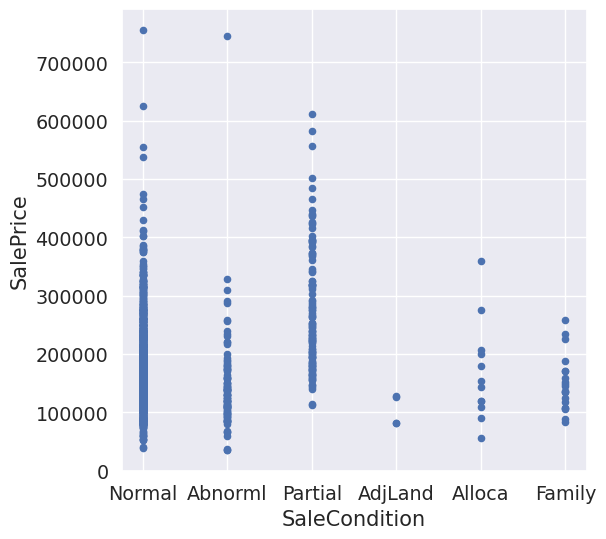

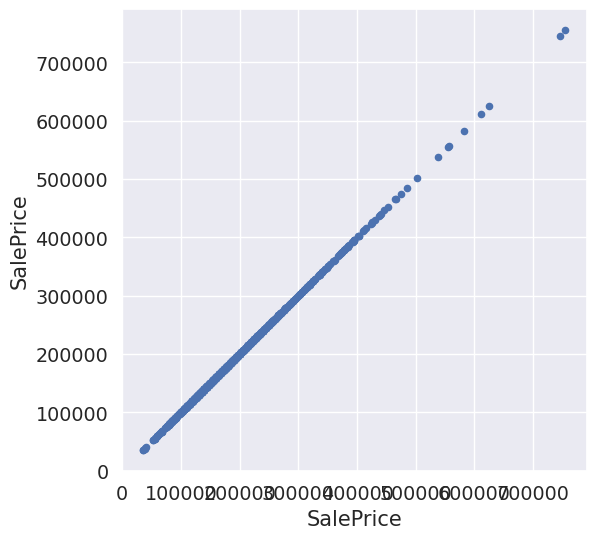

In [99]:
columns = train_df.columns
for column in columns:
    try:
        print(column)
        plotScatter(train_df[column], train_df['SalePrice'], column, 'SalePrice')
    except:
        print(column + 'error')

In [100]:
train_df = train_df.drop(train_df[train_df['LotFrontage']>150].index)
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
train_df = train_df.drop(train_df[train_df['LotArea']>50001].index)
train_df = train_df.drop(train_df[train_df['GrLivArea'] > 4000].index)
train_df.shape

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


(1439, 81)

In [101]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [102]:
all_data = pd.concat((train_df.loc[:,'Id':'SaleCondition'],
                      test_df.loc[:,'Id':'SaleCondition']))
print("\n train",train_df.shape)
print("\n test",test_df.shape)
print("\nall_data",all_data.shape)


 train (1439, 81)

 test (1459, 80)

all_data (2898, 80)


In [103]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

categorical_feats = pd.DataFrame(all_data.describe(include = ['O'])).columns

Y_train = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})

train_df["SalePrice"] = np.log1p(train_df["SalePrice"])


In [104]:
numeric_feats

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [105]:
REMOVING_THRESH = 0.8

total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))

             Total   Percent
PoolQC        2891  0.997585
MiscFeature   2795  0.964458
Alley         2701  0.932022
Fence         2329  0.803658
MasVnrType    1752  0.604555
FireplaceQu   1418  0.489303
LotFrontage    227  0.078330
GarageQual     158  0.054520
GarageCond     158  0.054520
GarageYrBlt    158  0.054520


In [106]:
(missing_data[missing_data['Percent'] > REMOVING_THRESH]).index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [107]:
all_data = all_data.drop(columns=(missing_data[missing_data['Percent'] > REMOVING_THRESH]).index,axis=1)
all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [108]:
all_data['LotArea']=np.log1p(all_data['LotArea'])

In [109]:
all_data["TotBsmtFin"] = all_data["BsmtFinSF1"] + all_data["BsmtFinSF2"]
                 
all_data = all_data.drop("BsmtFinSF1",axis=1)
all_data = all_data.drop("BsmtFinSF2",axis=1)

all_data["TotBath"] = all_data["FullBath"] + 0.5*all_data["HalfBath"] + all_data["BsmtFullBath"] + 0.5*all_data["BsmtHalfBath"]

all_data = all_data.drop("FullBath",axis=1)
all_data = all_data.drop("HalfBath",axis=1)
all_data = all_data.drop("BsmtFullBath",axis=1)
all_data = all_data.drop("BsmtHalfBath",axis=1)


print("all_data shape:",all_data.shape)

all_data shape: (2898, 72)


In [110]:
all_data["TotArea"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]

In [111]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.1]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
print("all_data shape:",all_data.shape)

all_data shape: (2898, 73)


/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [112]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotBsmtFin,TotBath,TotArea
0,1,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,1.098612,7.605392,WD,Normal,6.561031,1.504077,7.850493
1,2,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,1.791759,7.604894,WD,Normal,6.886532,1.252763,7.833996
2,3,4.110874,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,2.302585,7.605392,WD,Normal,6.188264,1.504077,7.903596
3,4,4.262680,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,1.098612,7.604396,WD,Abnorml,5.379897,1.098612,7.813592
4,5,4.110874,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,2.564949,7.605392,WD,Normal,6.486161,1.504077,8.114923


In [113]:
drop_columns = ["BsmtFinType1", "2ndFlrSF", "BedroomAbvGr", "LowQualFinSF", "3SsnPorch", "Condition2"]
for column in drop_columns:
    all_data = all_data.drop(column,axis=1)

all_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'TotBsmtFin', 'TotBath', 'TotAr

In [114]:
dummies = pd.get_dummies(all_data)
all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.median())
all_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,2.079442,1.791759,2003,2003,5.283204,5.017280,...,False,False,False,True,False,False,False,False,True,False
1,2,3.044522,4.394449,9.169623,1.945910,2.197225,1976,1976,0.000000,5.652489,...,False,False,False,True,False,False,False,False,True,False
2,3,4.110874,4.234107,9.328212,2.079442,1.791759,2001,2002,5.093750,6.075346,...,False,False,False,True,False,False,False,False,True,False
3,4,4.262680,4.110874,9.164401,2.079442,1.791759,1915,1970,0.000000,6.293419,...,False,False,False,True,True,False,False,False,False,False
4,5,4.110874,4.442651,9.565284,2.197225,1.791759,2000,2000,5.860786,6.196444,...,False,False,False,True,False,False,False,False,True,False


In [115]:
X_train = all_data[:train_df.shape[0]]
X_test = all_data[train_df.shape[0]:]
Y_train = train_df.SalePrice
X_train.head()
print("train_df.shape: ",train_df.shape)
print("X_Train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)

train_df.shape:  (1439, 81)
X_Train shape:  (1439, 253)
X_test shape:  (1459, 253)


<Axes: >

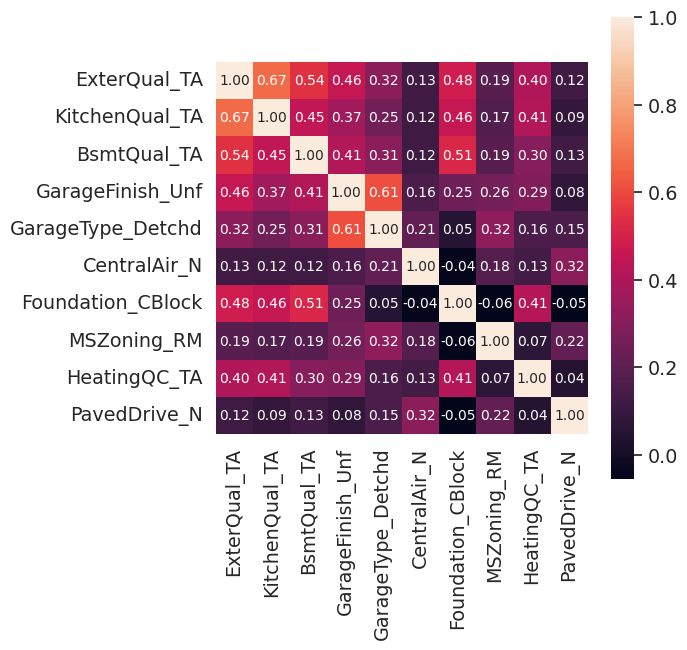

In [116]:
X_validate=X_train.assign(SalePrice=train_df.SalePrice, index=X_train.index)
corrmat = X_validate.corr()
cols = corrmat.nsmallest(10, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(X_validate[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm

In [117]:
def cross_score(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

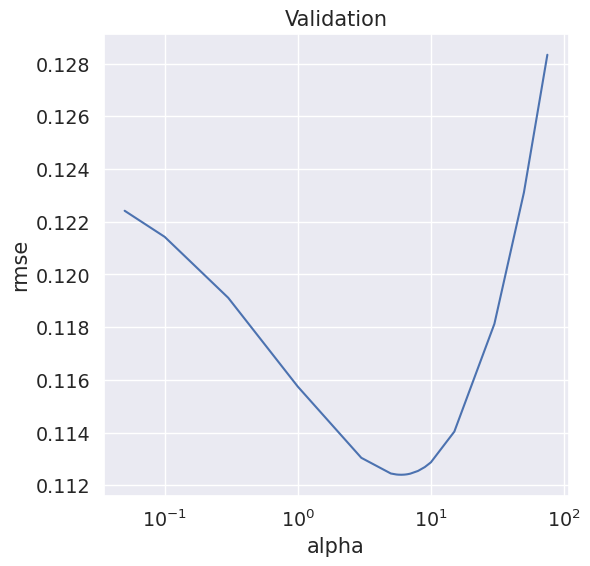

0.05     0.122416
0.10     0.121425
0.30     0.119115
1.00     0.115747
3.00     0.113046
5.00     0.112451
5.50     0.112414
5.70     0.112407
6.00     0.112404
6.30     0.112408
6.50     0.112415
6.70     0.112425
7.00     0.112445
8.00     0.112548
9.00     0.112695
10.00    0.112875
15.00    0.114040
30.00    0.118126
50.00    0.123110
75.00    0.128333
dtype: float64
The min value of Ridge is  0.11240362697358978


In [118]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 5.5, 5.7, 6, 6.3, 6.5, 6.7, 7, 8, 9, 10, 15, 30, 50, 75]
cv_ridge = [cross_score(Ridge(alpha = alpha)).mean() 
           for alpha in alphas]
    
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.xscale("log")
plt.show()
print(cv_ridge)
print("The min value of Ridge is ",cv_ridge.min())

In [119]:
best_alpha = 6
model_ridge = Ridge(alpha = best_alpha).fit(X_train, Y_train)

The min value of Lasso is  0.10944962643307296


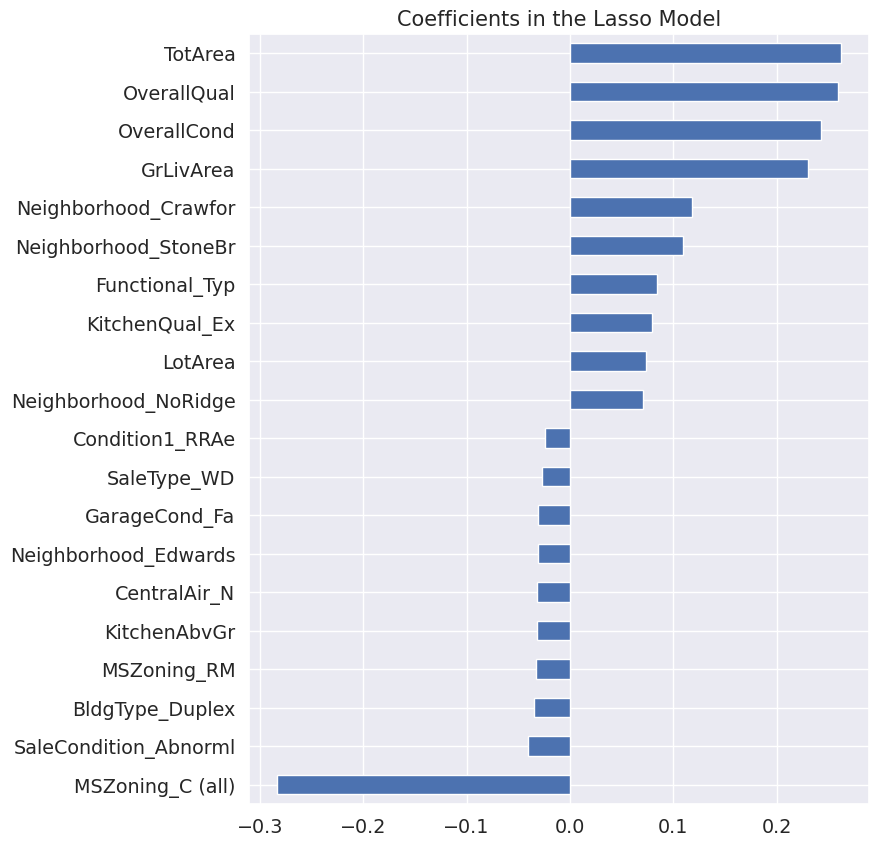

0       0.112084
1       0.515744
2       0.077664
3       1.785213
4       1.279944
          ...   
1455    0.009405
1456    0.303650
1457    0.279939
1458    0.052195
1459    0.101276
Name: residuals, Length: 1439, dtype: float64


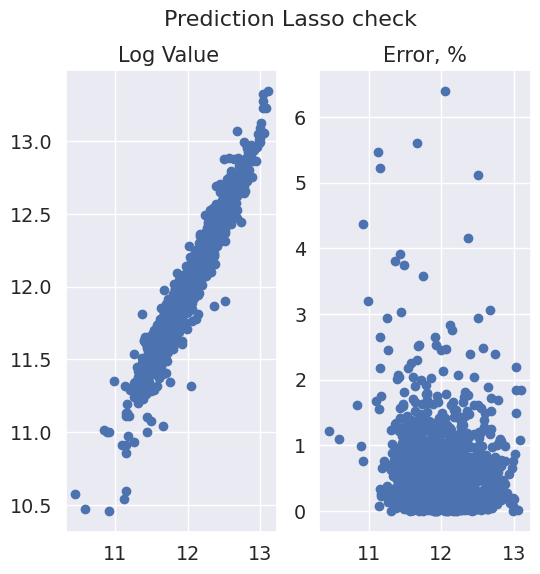

In [120]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, Y_train)
print("The min value of Lasso is ",cross_score(model_lasso).mean())
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")  
plt.show()  
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds_log = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":Y_train})
preds_val = np.expm1(preds_log)

preds_log["residuals"] = (np.abs(preds_log["true"] - preds_log["preds"]) / (preds_log["true"])) * 100
print(preds_log["residuals"])
fig = plt.figure()


fig.suptitle("Prediction Lasso check", fontsize=16)
ax = plt.subplot(121)
ax.set_title("Log Value ")
ax.scatter(preds_log["preds"],preds_log["true"])
ax = plt.subplot(122)
ax.set_title("Error, %")
ax.scatter(preds_log["preds"],preds_log["residuals"])
plt.show()

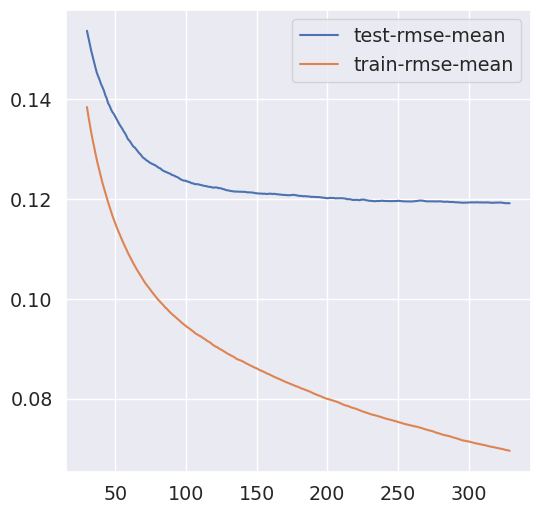

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [121]:
dtrain = xgb.DMatrix(X_train, label = Y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()
plt.show()


model_xgb = xgb.XGBRegressor(n_estimators=300, max_depth=2, learning_rate=0.1) 
model_xgb.fit(X_train, Y_train)


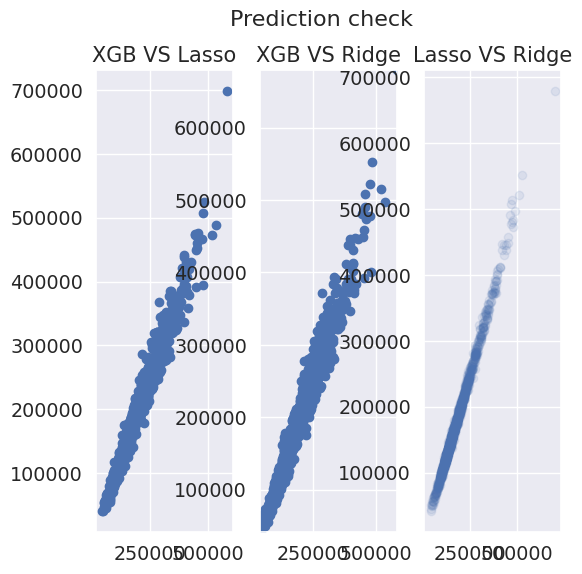

In [122]:
xgb_prediction = np.expm1(model_xgb.predict(X_test))
ridge_prediction = np.expm1(model_ridge.predict(X_test))
lasso_prediction = np.expm1(model_lasso.predict(X_test))

predictions_lasso = pd.DataFrame({"xgb":xgb_prediction, "lasso":lasso_prediction})

predictions_ridge = pd.DataFrame({"xgb":xgb_prediction, "ridge":ridge_prediction})

lasso_vs_ridge = pd.DataFrame({"lasso":lasso_prediction, "ridge":ridge_prediction})

fig = plt.figure()


fig.suptitle("Prediction check", fontsize=16)
ax = plt.subplot(131)
ax.set_title("XGB VS Lasso")
ax.scatter(xgb_prediction,lasso_prediction)

ax = plt.subplot(132)
ax.set_title("XGB VS Ridge")
ax.scatter(xgb_prediction,ridge_prediction)
ax.autoscale(tight=True)

ax = plt.subplot(133)
ax.set_title("Lasso VS Ridge")
ax.scatter(lasso_prediction,ridge_prediction,alpha=.1)

plt.show()

In [123]:
prediction = 0.30*lasso_prediction + 0.30*ridge_prediction + 0.40*xgb_prediction
submission = pd.DataFrame({"SalePrice":prediction,"id":test_df.Id})
submission.to_csv("/kaggle/working/submission.csv", index = False)